# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr

# Step 2 - Load and prepare hazard data
Use xarray to load hazard data.\
If this data is not a two-dimensional array, perform your desired selection or calculation (eg mean, min, max, percentile) to reduce data to 2D.

In [3]:
# load some dataset
filename = "/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/pr_AGCD-05i_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1-ACS-QME-AGCD-1960-2022_monthly.nc"
ds_pr = xr.open_dataset(filename)
ds_pr


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 660, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 5kB 1960-01-31T12:00:00 ... 2014-12-31T1...
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 11kB ...
    lon_bnds   (lon, bnds) float64 14kB ...
    lat_bnds   (lat, bnds) float64 11kB ...
    prAdjust   (time, lat, lon) float32 2GB ...
Attributes: (12/67)
    CDI:                         Climate Data Interface version 2.0.5 (https:...
    source:                      historical run using CSIRO-ARCCSS ACCESS-CM2...
    institution:                 Australian Climate Service
    Conventions:                 CF-1.10, ACDD-1.3
    activity_id:                 RCM
    title:                       Bias-adjusted model output
    ...                          ...
    bc_observation_id:           AGCD
    bc_period:                   1960-2022
    bc_info:                     ACS-QME-AGCD-1960-2022
    bc_code:                     https://github.com/AusClimateService/QME
    creation_date:               2024-06-23T18:50:44Z
    CDO:                         Climate Data Operators version 2.0.5 (https:...

In [4]:
# calculate a 2D dataArray to plot
var = "prAdjust"
da_pr_ann = ds_pr[var].groupby("time.year").sum(["time"]).mean(["year"])
da_pr_ann

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'


<xarray.DataArray 'prAdjust' (lat: 691, lon: 886)> Size: 2MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0

# Step 3 - Plot
Use ```plot_acs_hazard``` to visualise the hazard on a map of Australia.

There are quite a few options to modify this plotting. At a minimum, you will need:
 - **data**, a 2D xarray.DataArray of your hazard
 - **regions**, use the regions_dict to access region or state boundary shape data
 - **title**, title of plot naming the index or hazard you are plotting
 - **date_range**, date range of the data you have plotted, appears as a subtitle under the title
 - **cmap**, use the cmap_dict to access a range of recommended colormaps
 - **ticks**, use the tick_dict to access a range of useful ranges or input your own list or array
 - **cbar_label**, is the label for the colorbar. Give name and unit
 - **cbar_extend**, controls the arrows of the colorbar. Indicates that values beyond the colorbar are possible. Use 'neither' for finite ranges eg deciles. Use 'both' for anomalies or temperatures. Use 'max' for total rainfall, where negative values are not possible, but very large positive values are possible. "min" is also an option.
 - **dataset_name**, name of the data source eg "AGCD v2", "BARPA-R ACCESS-CM2"
 - (**baseline**, If plotting anomalies, give the base period as a string, eg "1961-1990")

CPU times: user 33.8 s, sys: 203 ms, total: 34 s
Wall time: 34.1 s


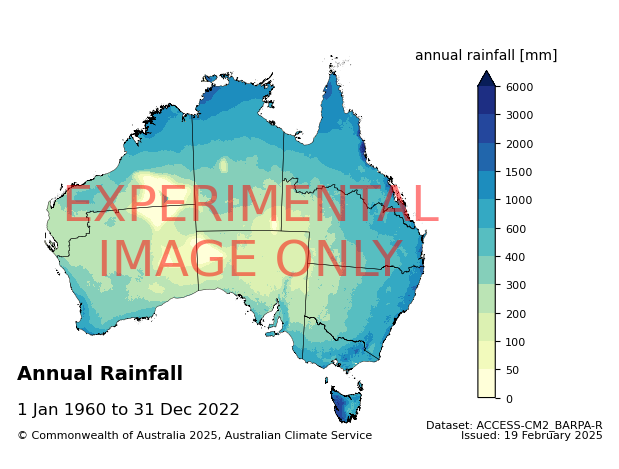

In [5]:
%%time
# Annual cumulative Rainfall
regions = regions_dict['ncra_regions']

plot_acs_hazard(data = da_pr_ann,
                regions = regions,
                title = "Annual Rainfall",
                date_range = "1 Jan 1960 to 31 Dec 2022",
                cmap = cmap_dict["pr"],
                ticks = tick_dict['pr_annual'],
                cbar_label = "annual rainfall [mm]",
                cbar_extend = "max",                
                dataset_name = "ACCESS-CM2_BARPA-R",
                outfile = "figures/out.png");

## Step 4: Calculate NCRA region statistics

In [6]:
# import needed packages
from acs_area_statistics import acs_regional_stats, get_regions

regions = get_regions(["ncra_regions", "australia"])

In [7]:
# for Calculating the NCRA region stats, 
# we want to compare the regional averages based on different models, 
# eg what is the regional mean value from the coolest/driest model relisation, what is the mean, what is the regional mean from the hottest/wettest model
# for this, we want ds to have the 10th, median and 90th percentile values from each model, then we can find the range of the models and the MMM
# probably need ds to be a dataset with lat lon grid for all models and mean, 10th and 90th percentile values across time 
ds = ds_pr.sum(dim="time")

In [8]:
%%time
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = "fractional", 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


!warning very slow! Calculating fractional mask every time is very slow.         
Please consider calculating `mask = regions.mask_3D_frac_approx(ds)` before function.
CPU times: user 21.8 s, sys: 1.96 s, total: 23.8 s
Wall time: 23.9 s


<xarray.Dataset> Size: 2kB
Dimensions:        (region: 10)
Coordinates:
  * region         (region) int64 80B 0 1 2 3 4 5 6 7 8 9
    abbrevs        (region) <U8 320B 'WANorth' 'WASouth' ... 'QLDSouth' 'AUS'
    names          (region) <U48 2kB 'Western Australia North' ... 'Australia'
Data variables:
    prAdjust_mean  (region) float64 80B 2.271e+04 1.458e+04 ... 2.486e+04
    prAdjust_min   (region) float32 40B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    prAdjust_max   (region) float32 40B 7.306e+04 6.672e+04 ... 2.227e+05

# Access the docstring for more info

In [9]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='ncra_regions',
    regions=None,
    data=None,
    station_df=None,
    markersize=None,
    stippling=None,
    shading=None,
    mask_not_australia=True,
    mask_australia=False,
    agcd_mask=False,
    facecolor='none',
    edgecolor='black',
    figsize=(6, 4.5),
    title='',
    date_range='',
    projection=None,
    area_linewidth=0.3,
    coastlines=False,
    xlim=(114, 154),
    ylim=(-43.5, -7.5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x150569de6c20>,
    cmap_bad='lightgrey',
    cbar_extend='both',
    ticks=None,
    tick_interval=1,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    contourf=False,
    contour=False,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    watermark_color='r',
    infile=None,
    outfile=None,
    savefig=True,
    tick_rotation=None,
    vcentre=None,
)
Docstring:
This function ta

In [10]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds=None,
    infile=None,
    var=None,
    mask=None,
    regions=None,
    dims=None,
    how=None,
    outfile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
    bins=None,
    bin_labels=None,
    chunks=None,
)
Docstring:
This function takes an Xarray dataset (ds) with variable (var)
and multiple dimensions (eg time, lat, and lon),
then selects the time range between two years (start and end),
and applies regions.mask_3D_frac_approx fractional mask (frac)
to compute a regional statistic (how, eg "mean") over two or three dimensions.
Best used with numerical data without nans.

Parameters
----------
ds: xr.Dataset or xr.DataArray
    expects an xr.Dataset with variable var and dimensions time, lat, and lon.

infile: str
    NetCDF file to read in as xr.Dataset

var: str
    name of variable in ds, eg "pr" or "tas".
    If None, then tries to infer the var name from the data

mask:  xarray.DataArray 'mask' or ["fracti